## Divorce prediction using Factor Analysis

In [1]:
# import necessary libraries

import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


Questions are ranked on a scale of 1-5 with 1 being the lowest and 5 being the highest. The last category states if the couple has divorced.

1.	If one of us apologizes when our discussion deteriorates, the discussion ends.
2.	I know we can ignore our differences, even if things get hard sometimes.
3.	When we need it, we can take our discussions with my spouse from the beginning and correct it.
4.	When I discuss with my spouse, to contact him will eventually work.
5.	The time I spent with my wife is special for us.
6.	We don't have time at home as partners.
7.	We are like two strangers who share the same environment at home rather than family.
8.	I enjoy our holidays with my wife.
9.	I enjoy traveling with my wife.
10.	Most of our goals are common to my spouse.
11.	I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12.	My spouse and I have similar values in terms of personal freedom.
13.	My spouse and I have similar sense of entertainment.
14.	Most of our goals for people (children, friends, etc.) are the same.
15.	Our dreams with my spouse are similar and harmonious.
16.	We're compatible with my spouse about what love should be.
17.	We share the same views about being happy in our life with my spouse
18.	My spouse and I have similar ideas about how marriage should be
19.	My spouse and I have similar ideas about how roles should be in marriage
20.	My spouse and I have similar values in trust.
21.	I know exactly what my wife likes.
22.	I know how my spouse wants to be taken care of when she/he sick.
23.	I know my spouse's favorite food.
24.	I can tell you what kind of stress my spouse is facing in her/his life.
25.	I have knowledge of my spouse's inner world.
26.	I know my spouse's basic anxieties.
27.	I know what my spouse's current sources of stress are.
28.	I know my spouse's hopes and wishes.
29.	I know my spouse very well.
30.	I know my spouse's friends and their social relationships.
31.	I feel aggressive when I argue with my spouse.
32.	When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33.	I can use negative statements about my spouse's personality during our discussions.
34.	I can use offensive expressions during our discussions.
35.	I can insult my spouse during our discussions.
36.	I can be humiliating when we discussions.
37.	My discussion with my spouse is not calm.
38.	I hate my spouse's way of open a subject.
39.	Our discussions often occur suddenly.
40.	We're just starting a discussion before I know what's going on.
41.	When I talk to my spouse about something, my calm suddenly breaks.
42.	When I argue with my spouse, ı only go out and I don't say a word.
43.	I mostly stay silent to calm the environment a little bit.
44.	Sometimes I think it's good for me to leave home for a while.
45.	I'd rather stay silent than discuss with my spouse.
46.	Even if I'm right in the discussion, I stay silent to hurt my spouse.
47.	When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48.	I feel right in our discussions.
49.	I have nothing to do with what I've been accused of.
50.	I'm not actually the one who's guilty about what I'm accused of.
51.	I'm not the one who's wrong about problems at home.
52.	I wouldn't hesitate to tell my spouse about her/his inadequacy.
53.	When I discuss, I remind my spouse of her/his inadequacy.
54.	I'm not afraid to tell my spouse about her/his incompetence.
55. 	Divorce Y/N

In [2]:
# Load the files
df = pd.read_csv("divorce.csv")
df.shape

(170, 55)

In [3]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [4]:
#
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,harmony,freeom_value,entertain,people_goals,dreams,love,happy,marriage,roles,trust,likes,care_sick,fav_food,stresses,inner_world,anxieties,current_stress,hopes_wishes,know_well,friends_social,Aggro_argue,Always_never,negative_personality,offensive_expressions,insult,humiliate,not_calm,hate_subjects,sudden_discussion,idk_what's_going_on,calm_breaks,argue_then_leave,silent_for_calm,good_to_leave_home,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1


Values in all columns have integer data type

The dataset contains the rating given by person to his/her spouse based on 55 different questions asked related to marriage life.

And, the person has to rate from 0 - 4, with 0 being lowest and 4 being highest

In [5]:
#
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))

que_rate_df = pd.DataFrame(values).T

que_rate_df.head()

,0,3,4,2,1
Sorry_end,40.59,27.65,18.24,8.24,5.29
Ignore_diff,34.71,22.35,12.94,16.47,13.53
begin_correct,30.00,30.59,10.00,15.29,14.12
Contact,44.12,18.82,12.35,17.65,7.06
Special_time,48.24,25.88,15.29,4.71,5.88


In [6]:
#
que_rate_df = que_rate_df[range(5)]

que_rate_df

,0,1,2,3,4
Sorry_end,40.59,5.29,8.24,27.65,18.24
Ignore_diff,34.71,13.53,16.47,22.35,12.94
begin_correct,30.00,14.12,15.29,30.59,10.00
Contact,44.12,7.06,17.65,18.82,12.35
Special_time,48.24,5.88,4.71,25.88,15.29
No_home_time,50.59,28.82,17.06,2.35,1.18
2_strangers,67.06,24.71,2.94,2.35,2.94
enjoy_holiday,47.65,5.88,12.35,21.76,12.35
enjoy_travel,49.41,4.12,7.65,28.82,10.00
common_goals,36.47,10.59,22.35,20.00,10.59


In [7]:
#
print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'yellow',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
Sorry_end,40.6%,5.3%,8.2%,27.6%,18.2%
Ignore_diff,34.7%,13.5%,16.5%,22.4%,12.9%
begin_correct,30.0%,14.1%,15.3%,30.6%,10.0%
Contact,44.1%,7.1%,17.6%,18.8%,12.3%
Special_time,48.2%,5.9%,4.7%,25.9%,15.3%
No_home_time,50.6%,28.8%,17.1%,2.4%,1.2%
2_strangers,67.1%,24.7%,2.9%,2.4%,2.9%
enjoy_holiday,47.6%,5.9%,12.3%,21.8%,12.3%
enjoy_travel,49.4%,4.1%,7.7%,28.8%,10.0%
common_goals,36.5%,10.6%,22.4%,20.0%,10.6%


In [8]:
#
df.corr()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,harmony,freeom_value,entertain,people_goals,dreams,love,happy,marriage,roles,trust,likes,care_sick,fav_food,stresses,inner_world,anxieties,current_stress,hopes_wishes,know_well,friends_social,Aggro_argue,Always_never,negative_personality,offensive_expressions,insult,humiliate,not_calm,hate_subjects,sudden_discussion,idk_what's_going_on,calm_breaks,argue_then_leave,silent_for_calm,good_to_leave_home,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
Sorry_end,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,0.892253,0.794307,0.842996,0.817099,0.848754,0.831822,0.895970,0.853739,0.900446,0.840966,0.815708,0.785280,0.822534,0.813233,0.822084,0.803507,0.829037,0.762102,0.858139,0.792257,0.699223,0.739679,0.799735,0.749774,0.796413,0.812867,0.786890,0.804129,0.817035,0.838355,0.804182,0.642307,0.482223,0.752972,0.510160,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Ignore_diff,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,0.823380,0.862835,0.791073,0.875800,0.801316,0.806497,0.822317,0.883856,0.829422,0.884176,0.790468,0.795406,0.773018,0.868240,0.769244,0.861421,0.817364,0.776943,0.789827,0.844007,0.661210,0.735763,0.757286,0.714360,0.753566,0.781295,0.747088,0.751705,0.787768,0.788200,0.780757,0.648539,0.503894,0.699765,0.489062,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
begin_correct,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,0.805915,0.780258,0.758969,0.750602,0.806909,0.775528,0.808161,0.797395,0.798999,0.807892,0.796069,0.727933,0.706585,0.740476,0.724506,0.728653,0.797595,0.689914,0.755491,0.752391,0.652188,0.747669,0.726481,0.702500,0.730290,0.744390,0.736984,0.740642,0.759820,0.781657,0.739967,0.569293,0.385152,0.661830,0.427409,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Contact,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,0.808533,0.793992,0.751623,0.757000,0.794184,0.878416,0.809968,0.835296,0.832750,0.815896,0.775132,0.839534,0.744783,0.776640,0.736228,0.762765,0.767206,0.827847,0.781792,0.772562,0.661251,0.746677,0.764381,0.729022,0.770813,0.794636,0.760451,0.790350,0.763502,0.798520,0.768706,0.639671,0.452479,0.707212,0.446798,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Special_time,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,0.936955,0.846513,0.915033,0.845576,0.879461,0.853561,0.947429,0.894474,0.943349,0.892909,0.871994,0.840265,0.888584,0.833608,0.888740,0.836194,0.883768,0.809789,0.925601,0.837501,0.785038,0.832032,0.879037,0.827560,0.878289,0.887498,0.859581,0.852601,0.866293,0.871809,0.864434,0.737922,0.613142,0.799453,0.591656,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
No_home_time,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,0.340135,0.209801,0.305109,0.224459,0.323787,0.311056,0.377330,0.251856,0.365227,0.230486,0.273564,0.220010,0.246478,0.191458,0.291159,0.200634,0.283895,0.254858,0.309302,0.266464,0.247634,0.316605,0.292037,0.279789,0.276539,0.287708,0.281458,0.297791,0.296121,0.351433,0.329765,0.227993,0.171599,0.339918,0.094820,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
2_strangers,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,0.432479,0.511761,0.373361,0.491021,0.494110,0.573290,0.461450,0.544550,0.469995,0.544207,0.409827,0.378915,0.254912,0.446469,0.288867,0.443149,0.444

Text(0.5, 1.0, 'Correlation value between ratings given for questions')

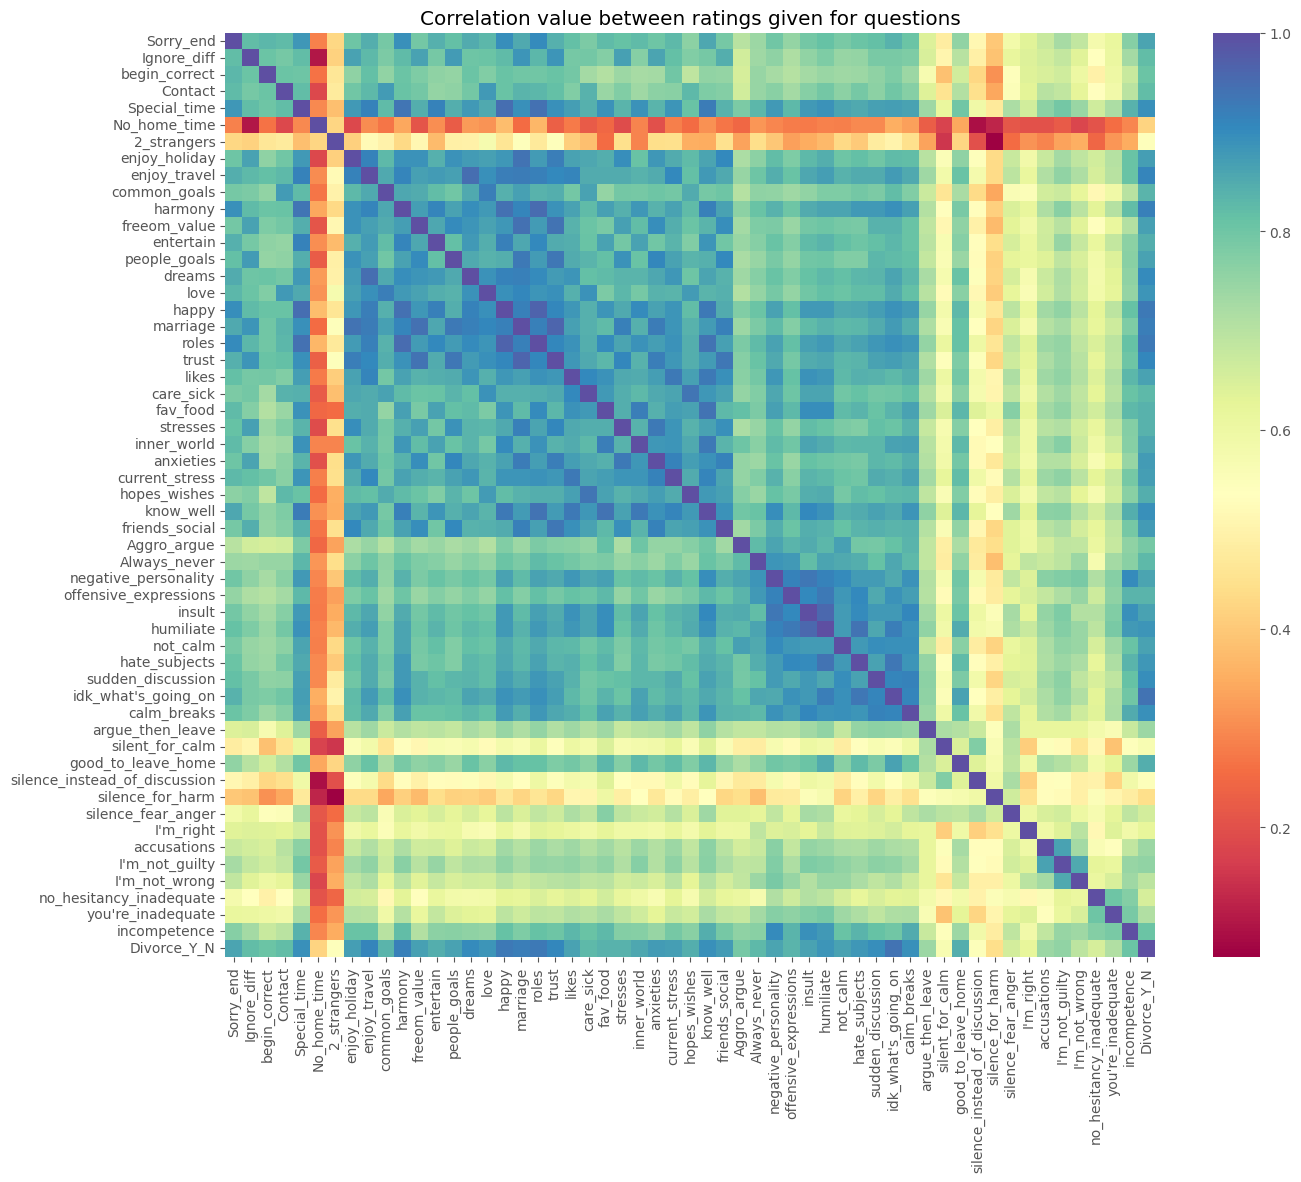

In [9]:
# Correlation study

plt.figure( figsize = (15, 12) )
sns.heatmap( df.corr(), cmap = 'Spectral' )
plt.title( "Correlation value between ratings given for questions" )

Since most of the features are correlated with each other, its better to factor analysis

### Factor Analysis

Factor analysis is a linear statistical model, that is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms. Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.

### Why Factor Analysis and not PCA?

1. Both Principal Components Analysis (PCA) and Factor Analysis are dimension reduction techniques.
2. Principal Component analysis makes the components that are completely orthogonal to each other whereas Factor analysis does not require such the factors to be orthogonal
3. Principal Components is primarily an exploratory technique to rationalize the number of variables in an analysis (for further causal analysis). Factor analysis, on the other hand, is approached with a prior knowledge or belief that which variables may be similar and therefore should load on a single factor. Factor analysis is thus a popular variable reduction technique in market research.

### Test to check for adequacy

The following tests are used to check the adequacy to apply factor analysis to the dataset.

**1. BARTLETT’S TEST OF SPHERICITY**

**2. KAISER-MEYER-OLKIN (KMO) TEST**

#### Bartlett's test of sphericity

H0 : Correlation matrix is an Identical matrix

H1 : Correlation matrix is not Identical matrix

In [10]:
#
!pip install factor_analyzer

In [11]:
#
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [12]:
#
data = df.drop('Divorce_Y_N',axis=1)

In [13]:
#
chi2, p = calculate_bartlett_sphericity( data )
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  17606.430077903235
p value :  0.0


**The p-value < 0.05, correlation is present among the variables with 95% confidence interval**

### KMO Test

KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. **KMO score is always between 0 to 1 and values more than 0.6 are much appreciated.**

In [14]:
#
from factor_analyzer.factor_analyzer import calculate_kmo


In [15]:
#
kmo_vars,kmo_model = calculate_kmo( data )
print(kmo_model)

0.9643724872807451


**KMO score is close to 1, thus applying factor analysis can be effective for the dataset.**

In [16]:
#
from factor_analyzer import FactorAnalyzer


In [17]:
#
n = data.shape[1]
fa = FactorAnalyzer( rotation = None, impute = "drop", n_factors=n)
fa.fit(data)
ev,_ = fa.get_eigenvalues()

ev

array([4.01756867e+01, 2.16531589e+00, 1.41651436e+00, 1.19405368e+00,
       8.96249766e-01, 7.88897467e-01, 6.98636632e-01, 5.95362778e-01,
       5.68366461e-01, 5.29115848e-01, 4.28671399e-01, 3.90369411e-01,
       3.62469358e-01, 3.19198119e-01, 2.83031788e-01, 2.70341457e-01,
       2.52520084e-01, 2.20402276e-01, 2.02203198e-01, 1.91133304e-01,
       1.75596029e-01, 1.65126304e-01, 1.38913064e-01, 1.32199503e-01,
       1.19176457e-01, 1.07826952e-01, 1.03507589e-01, 1.00321611e-01,
       9.48779953e-02, 8.83932265e-02, 7.82819003e-02, 7.10819919e-02,
       6.61273710e-02, 6.21878385e-02, 5.42665704e-02, 5.37969531e-02,
       5.01311101e-02, 4.64030261e-02, 3.99427933e-02, 3.83918809e-02,
       3.53348952e-02, 3.01372243e-02, 2.80488023e-02, 2.49852654e-02,
       2.17052887e-02, 2.16659686e-02, 1.81846648e-02, 1.60713319e-02,
       1.50625288e-02, 1.31196938e-02, 1.19387963e-02, 1.10997856e-02,
       9.73035916e-03, 7.82527366e-03])

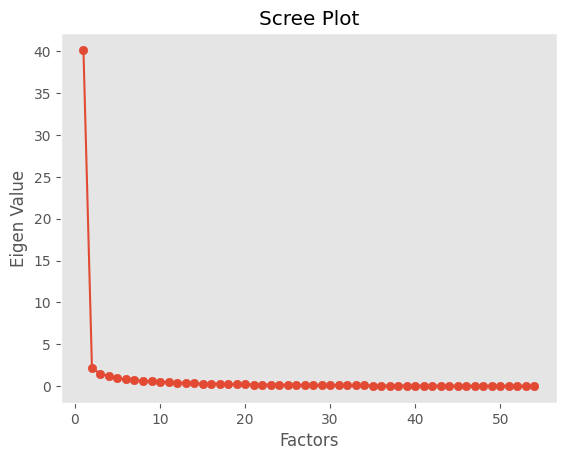

In [18]:
#
plt.scatter( range(1,n+1) , ev)
plt.plot( range(1,n+1) , ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

### Factor Loading

Factor loading can tell us how each factor created is explaining each of the variable. More value says that factor explains well about that variable. Sorting the factor load values helps us understand which variables are grouped to represent a new factor.

In [19]:
#
fa = FactorAnalyzer( n_factors = 5, rotation = 'varimax' )
fa.fit( data )
fa_load = pd.DataFrame( fa.loadings_ , index=data.columns )

fa_load

,0,1,2,3,4
Sorry_end,0.698027,0.415375,0.251573,0.221070,0.190562
Ignore_diff,0.799304,0.312126,0.248137,0.007242,0.249143
begin_correct,0.685239,0.362436,0.142554,0.229959,0.270391
Contact,0.721785,0.372486,0.181268,0.174657,0.242710
Special_time,0.660066,0.506009,0.377305,0.198270,0.168693
No_home_time,0.087527,0.188128,0.079898,0.574254,-0.039732
2_strangers,0.433963,0.017474,-0.018941,0.567000,0.249501
enjoy_holiday,0.779464,0.399979,0.314565,0.054577,0.152865
enjoy_travel,0.724568,0.405889,0.343090,0.273173,0.175023
common_goals,0.767630,0.352012,0.183620,0.240463,0.133885


In [20]:
def highlight_max(s):
    # Get 10 largest values of the column
    is_large = s.nlargest(10).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1,2,3,4
marriage,0.836865,0.327699,0.292841,0.200275,0.154872
freeom_value,0.828267,0.310767,0.248492,0.167567,0.151989
anxieties,0.805294,0.348423,0.351402,0.059615,0.078859
trust,0.804204,0.380394,0.284953,0.160955,0.201407
people_goals,0.801431,0.333058,0.297584,0.118715,0.132737
Ignore_diff,0.799304,0.312126,0.248137,0.007242,0.249143
enjoy_holiday,0.779464,0.399979,0.314565,0.054577,0.152865
love,0.773158,0.329500,0.264030,0.300530,0.150878
stresses,0.773062,0.367266,0.351396,0.042589,0.140685
common_goals,0.767630,0.352012,0.183620,0.240463,0.133885


In [21]:
#
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4
Variance          20.309095  12.237168  7.698707  2.489724  1.823363
Proportional Var   0.376094   0.226614  0.142569  0.046106  0.033766
Cumulative Var     0.376094   0.602709  0.745277  0.791383  0.825149


**The new 5 factors created can explain 82.5% variance in the data.**

### Model Prediction

In [22]:
#
X = data.copy()
y = df['Divorce_Y_N'].copy()
X.shape, y.shape

((170, 54), (170,))

In [23]:
#
from sklearn.decomposition import FactorAnalysis


In [24]:
#
transformer = FactorAnalysis( n_components = 5, random_state = 0 )
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(170, 5)

In [25]:
#
X_transformed

array([[-6.84425004e-01, -6.76200962e-01,  1.70755859e+00,
        -4.00570481e-01, -4.12664687e-01],
       [ 6.41631624e-01,  1.77657559e+00,  2.57279238e+00,
         3.38866612e+00, -2.67264827e+00],
       [ 3.60970457e-01,  1.84530376e+00, -1.18511563e-01,
         1.28023169e+00,  5.88634779e-01],
       [ 5.42003602e-01,  1.95655842e+00,  2.08642339e+00,
         1.74395986e+00, -1.55186005e+00],
       [-5.39299185e-01,  8.79006310e-01, -7.05261090e-01,
        -8.23169260e-02,  2.18350851e-01],
       [-5.71287593e-01,  1.86757323e-01,  6.85728634e-01,
        -1.92701664e-01,  6.88196979e-01],
       [ 5.31401790e-01,  1.51967692e+00, -6.81625221e-01,
        -2.39773266e-02, -2.48658486e-01],
       [ 4.46487324e-01,  1.77933337e+00,  7.98611521e-01,
         8.09310242e-01,  1.29614233e+00],
       [ 4.08116738e-01,  2.79737428e+00, -6.16974223e-01,
         4.23824187e-01,  1.02459191e+00],
       [-3.79516470e-01,  8.93515664e-01,  2.10413425e-01,
         7.01944814e-01

In [26]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [27]:
#
model = LogisticRegression()
model.fit(X_transformed, y)


LogisticRegression()

In [28]:
#
y_pred = model.predict(X_transformed)

print(f"Accuracy Score: {accuracy_score(y, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred))

Accuracy Score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        86
           1       1.00      0.95      0.98        84

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



In [29]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [[ 3.67596339  0.34803943  0.55985985  0.06781319 -0.16914307]]
Model Intercept: [0.47828001]


In [30]:
#
model_original = LogisticRegression()
model_original.fit(X, y)


LogisticRegression()

In [31]:
#
y_pred_original = model_original.predict(X)

print(f"Accuracy Score: {accuracy_score(y, y_pred_original):.2f}")
print("\nClassification Report:")
print(classification_report(y, y_pred_original))

Accuracy Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        84

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

